# (p,q) = (3,5)
# IC: u(x,0) = 5x
# BC : u(0,t) = 3t & u(8,t) = 3t+40

In [27]:
###################
# Independent variable functions
#      u(x,t_0) = f(x)
#      u(x_0,t) = g1(t)
#      u(x_n,t) = g2(t)
def f(x):
    """Inputs position array x and outputs f(x)."""
    import numpy as np
    return 5 * x

def g1(t):
    """Inputs time array t and outputs g1(t)."""
    import numpy as np
    return 3 * t

def g2(t):
    """Inputs time array t and outputs g2(t)."""
    import numpy as np
    return 3 * t + 40




###################
# Matrix generation functions
def initial_u_matrix(x_val,t_val):
    """
    Creates a very specific matrix that includes all our initial and boundary values such that our
    unknown values are 0.
    
    This foundation will be:
    [u(x_0,t_0) ; u(x_0,t_1) ; u(x_0,t_2) ; ... ; u(x_0,t_n)]
    [u(x_1,t_0) ;     0      ;     0      ; ... ;     0     ]
    [u(x_2,t_0) ;     0      ;     0      ; ... ;     0     ]
    [    ...    ;     0      ;     0      ; ... ;     0     ]
    [u(x_n,t_0) ; u(x_n,t_1) ; u(x_n,t_2) ; ... ; u(x_n,t_n)]
    =
    [  0  ;  t_1  ;  t_2  ; ... ;  t_n  ]
    [ x_1 ;   0   ;   0   ; ... ;   0   ]
    [ x_2 ;   0   ;   0   ; ... ;   0   ]
    [ ... ;   0   ;   0   ; ... ;   0   ]
    [  1  ; 1+t_1 ; 1+t_2 ; ... ; 1+t_n ]
    """
    import numpy as np
    
    # Create our zero matrix and make the first row t_val
    matrix = np.zeros((x_val.size,t_val.size))
    matrix[0] = g1(t_val)
    
    # Make the first column x_val and last row 1+t_val
    matrix[:,0] = f(x_val)
    matrix[-1] = g2(t_val)
    
    return matrix

def deriv_matrix(dimension):
    """
    Inputs a dimension to generate an nxn matrix with -1,0,1 in each row and 0 in the diagonal.
    
    We'll do this by generating two matrices and adding them together
    """
    import numpy as np
    
    # Matrix 1
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal 1's
    mat1 = np.zeros((dimension-1,dimension-1), dtype = "int8")
    np.fill_diagonal(mat1, int(1))
    
    # Add a row of 0's to the bottom and column of 0's to the left
    row = np.zeros((dimension-1,1), dtype = "int8")
    mat1 = np.hstack((row, mat1))

    column = np.zeros((1,dimension), dtype = "int8")
    mat1 = np.vstack((mat1, column))
    
    
    
    
    # Matrix 2
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal -1's
    mat2 = np.zeros((dimension-1,dimension-1), dtype = "int8")
    np.fill_diagonal(mat2, int(-1))
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-1,1), dtype = "int8")
    mat2 = np.hstack((mat2, row))

    column = np.zeros((1,dimension), dtype = "int8")
    mat2 = np.vstack((column, mat2))
    
    
    
    
    # Output our completed matrix
    return mat1 + mat2




###################
# Graphing functions
def graph_3d(x,t,u):
    """Inputs position matrix (x), time matrix (t), and
    resulting displacement matrix (u) to generate a 3D surface graph."""
    
    # Import libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create 3D axis and plot points
    fig = plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')
    

    
    
    ax.plot_surface(x, t, u, cmap = 'viridis')
    
    # Label the axes
    ax.set_xlabel('Position')
    ax.set_ylabel('Time')
    ax.set_zlabel('Displacement')
    
    # Rotate and display the plot
    ax.view_init(40,250)
    ax.set_box_aspect(None, zoom=1)
    plt.show()

def graph_compare(x_array, t_array, u_array, u_expected):
    """
    Inputs the observed and expected values of a 3D graph, and shows the observed versus expected values of the
    two graphs at the middle x and t points.
    """
    # Import Modules
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Set up subplot qualities
    plt.figure(figsize=(10,4))
    plt.suptitle("Approximated versus Expected Values")
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
    
    
    
    ### u(x,Q2)
    plt.subplot(1,2,1)
    plt.xlabel("Position")
    plt.ylabel("Displacement")
    
    # Width of t array divided by 2 gives Q2
    t_pt = t_array[0][t_array.shape[1] // 2]
    plt.title(f"u(x,{round(t_pt,3)})")
    
    # Set up x-values, u_approx values, and u_exact values
    x_val = x_array[:,0]
    u_aprox = u_array[:,u_array.shape[1] // 2]
    u_exact = u_expected[:,u_array.shape[1] // 2]
    
    # Plot everything
    plt.grid()
    plt.plot(x_val,u_aprox, color="red", linestyle="dashed", label="Observed Values")
    plt.plot(x_val,u_exact, color="black", label="Exact Values")
    plt.legend()
    
    
    ### u(Q2,t)
    plt.subplot(1,2,2)
    plt.xlabel("Time")
    
    # Height of x array divided by 2 gives Q2
    x_pt = x_array[x_array.shape[0] // 2][0]
    plt.title(f"u({round(x_pt,3)},t)")
    
    # Set up t-values, u_approx values, and u_exact values
    t_val = t_array[0]
    u_aprox = u_array[u_array.shape[0] // 2]
    u_exact = u_expected[u_array.shape[0] // 2]
    
    # Plot everything
    plt.grid()
    plt.plot(t_val,u_aprox, color="red", linestyle="dashed", label="Observed Values")
    plt.plot(t_val,u_exact, color="black", label="Exact Values")
    plt.legend()
    
    
    plt.show()
    
    
def graph_error(x_array, t_array, u_array, u_expected):
    """
    Inputs the observed and expected values of a 3D graph, and shows the absolute errors for the
    three quartiles (Q1,Q2,Q3) of both values.
    
    For example, if our outputs come from x=(1,2,3,4,5) t=(0,0.25,0.5,0.75,1), we would show the following errors:
    u(x,0.25), u(x,0.5), u(x,0.75)
    u(2,t), u(3,t), u(4,t)
    """
    # Import Modules
    import matplotlib.pyplot as plt
    import numpy as np
    
    # Set up subplot qualities
    plt.figure(figsize=(10,4))
    plt.suptitle("Absolute Errors")
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
    
    
    
    
    ### u(x,Q2)
    plt.subplot(1,2,1)
    plt.ylabel("Difference")
    
    # Width of t array divided by 2 gives Q2
    t_pt = t_array[0][t_array.shape[1] // 2]
    plt.title(f"u(x,{round(t_pt,3)})")
    plt.xlabel("Position")
    
    # Plot x-values and outputs
    x_val = x_array[:,0]
    e_val = abs(u_array[:,u_array.shape[1] // 2] - u_expected[:,u_array.shape[1] // 2])
    plt.grid()
    plt.plot(x_val, e_val)
    
    
    
    
    ### u(Q2,t)
    plt.subplot(1,2,2)
    
    # Height of x array divided by 2 gives Q2
    x_pt = x_array[x_array.shape[0] // 2][0]
    plt.title(f"u({round(x_pt,3)},t)")
    plt.xlabel("Time")
    
    # Plot t-values and outputs
    t_val = t_array[0]
    e_val = abs(u_array[u_array.shape[0] // 2] - u_expected[u_array.shape[0] // 2])
    plt.grid()
    plt.plot(t_val, e_val, color="peru")
    
    
    
    
    plt.show()

In [28]:
def ux_to_ut(x_int,t_int):
    """
    This solves the PDE u_x=u_t with the specified initial and boundary conditions.
    The minimum values of x & t are both 0, and they might have pre-determined maximum values.
    
    In this case, 0<x<8 and for accuracy reasons, 0<t<1.
    """
    # Import Modules
    import numpy as np
    from time import time
    begin = time()
    
    
    
    
    # Make our arrays of x and t inputs and the x interval width constant
    x_val = np.linspace(0, 8, x_int+1)
    t_val = np.linspace(0, 1, t_int+1)
    x_width = 8 / x_int
    t_width = 1 / t_int
    r = t_width / x_width

    

    
    # Make our input arrays into repeated matrices
    T_val, X_val = np.meshgrid(t_val,x_val)
    
    # Create the foundation for our output matrix
    U_val = initial_u_matrix(x_val,t_val)
    
    # Create our derivative and identity matrices for V(t)
    D1_matrix = deriv_matrix(x_val.size-2)
    I_matrix = np.identity(x_val.size-2)
    
    # Create an array that's necessary for later math to work out
    temp_array = np.zeros(x_val.size-2)
    
    # Make our m-constant that's important for upcoming math
    m = 3 / (10 * x_width)
    
    
    
    
    # Go through every column in our U-matrix that hasn't pre-emptively been filled in
    # This would be the 2nd column all the way to the last one.
    for column in range(1, t_int+1):
            
        # The zeros in each column go through ALL x-values from x_1 to x_{n-1}
        # Each column is one SPECIFIC t-value though
        temp_t = t_val[column]
        
        
        # Alter our temp array based on the current t-value
        temp_array[0] = -6 * (temp_t ** 2)
        temp_array[1] = 3 * m * (temp_t ** 3)
        temp_array[-2] = 3 * m * (temp_t ** 3) + 40 * m * (temp_t ** 2)
        temp_array[-1] = 6 * (temp_t ** 2) + 80 * temp_t
            
        # Make an array that will replace the 0's in the current column
        temp_u = np.matmul( I_matrix + m * temp_t * D1_matrix , f(x_val[1:-1]) ) + 0.5 * m * temp_array
        U_val[:,column][1:-1] = temp_u
    
        
    
    
    # Display our approximated graph and error graphs
    print(f"R Accuracy Value (Should be less than 1): {round(r,3)}")
    graph_3d(X_val, T_val, U_val)
    u_expected = (5 * X_val) + (3 * T_val)
    graph_compare(X_val, T_val, U_val, u_expected)
    graph_error(X_val, T_val, U_val, u_expected)
    
    
    print(f"Finished in {round(time()-begin,3)} seconds.")

R Accuracy Value (Should be less than 1): 0.001


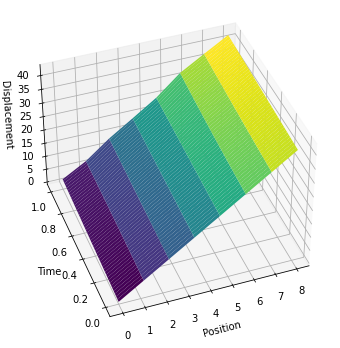

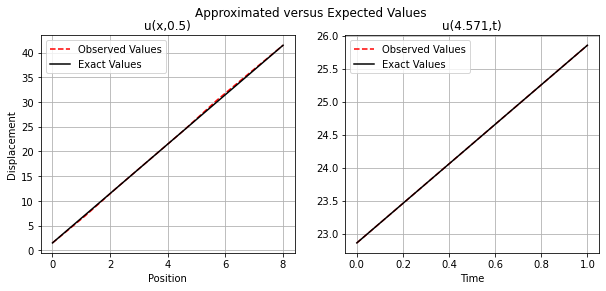

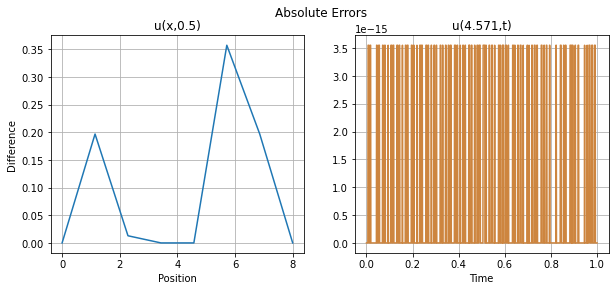

Finished in 0.892 seconds.


In [29]:
# First is number of x intervals and second is number of t intervals
# You WANT there to be significantly more t values than x-values in order to maximize accuracy.
ux_to_ut(7,1000)